### Using data from https://arxiv.org/pdf/1906.03924.pdf
change ; to , : 
sed 's/;/\,/g' asu.tsv >> output.csv

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

def temp(l):
    sun = 5778
    frac = 1/4
    return math.pow(l, frac) * sun

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4))
    return math.log10(math.sqrt(ans))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

In [4]:
asu = pd.read_csv("asupleiades.csv")
asu.head(10)

,RA_ICRS,DE_ICRS,SourceCP,RVCP,PlxCP,GmagCP,pmRACP,pmDECP,bx,by,...,2MASS,WISE,SDSS,ps1name,SimbadName,gsc9name,_RA.icrs,_DE.icrs,B-R,G-R
0,40.974958,22.655750,8.890000e+16,,6.71157,18.172001,14.119,-30.067,-112.216,54.058,...,02435399+2239209,J024354.01+223920.6,,,,,40.974892,22.655880,2.655600,1.720500
1,41.714667,22.655861,1.130000e+17,,8.07824,20.066000,22.674,-54.558,-94.145,43.939,...,02465148+2239219,J024651.51+223921.5,,,,,41.714561,22.656096,2.584900,1.624600
2,42.242875,27.033833,1.150000e+17,,8.03954,18.396999,20.544,-32.089,-96.912,49.626,...,02485826+2702024,J024858.27+270202.0,,,,,42.242776,27.033972,3.467699,1.374000
3,42.822208,28.811111,1.290000e+17,,7.39081,20.045000,41.375,-65.287,-106.706,55.827,...,02511726+2848412,J025117.31+284840.4,,,,,42.822005,28.811392,2.576500,1.484501
4,42.928667,31.943389,1.300000e+17,,7.49413,20.243000,30.704,-44.299,-106.068,59.397,...,02514283+3156368,J025142.86+315636.4,J025142.86+315636.9,,,,42.928511,31.943580,3.138399,1.734700
5,43.052792,26.245944,1.150000e+17,,6.61376,20.782000,35.595,-98.306,-118.651,57.729,...,02521263+2614471,J025212.65+261445.9,,,,,43.052621,26.246368,2.230799,1.551900
6,43.054042,24.538083,1.130000e+17,,7.10538,16.629000,30.985,-46.640,-109.754,51.005,...,02521292+2432177,J025212.96+243217.2,,,,,43.053895,24.538284,3.002501,1.311600
7,43.105250,30.620806,1.290000e+17,,7.92363,17.341000,26.947,-48.168,-100.276,54.185,...,02522523+3037158,J025225.25+303715.1,,,,,43.105115,30.621013,3.134300,1.312900
8,43.169958,24.849361,1.140000e+17,,6.98470,20.257999,15.325,-34.699,-111.943,52.221,...,02524078+2450585,J025240.77+245058.0,,,,,43.169886,24.849511,2.822800,1.469200
9,43.254042,22.638222,1.100000e+17,,7.10482,20.365999,129.400,-209.912,-109.154,47.621,...,02530084+2238208,J025300.69+223817.3,,,,,43.253438,22.639126,2.489799,1.713600


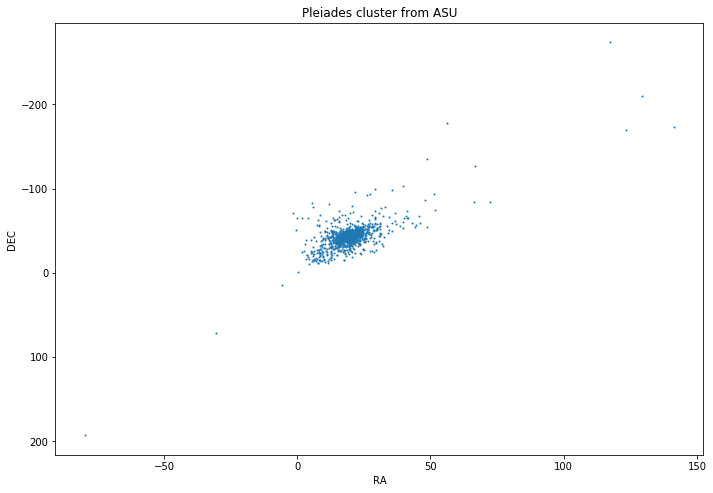

In [5]:
plt.scatter(asu['pmRACP'], asu['pmDECP'], s=1)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title('Pleiades cluster from ASU')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.gca().invert_yaxis()
plt.show()

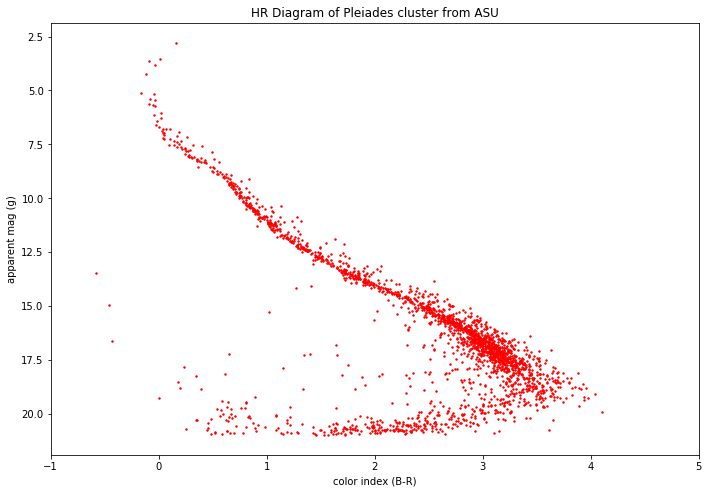

In [6]:
plt.scatter(asu['B-R'], asu['Gmag'], s=2, color='red')
plt.xlim(-1, 5)
plt.xlabel("color index (B-R)")
plt.ylabel("apparent mag (g)")
plt.title('HR Diagram of Pleiades cluster from ASU')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.gca().invert_yaxis()
plt.show()

In [7]:
count = 0
arr = []
for star in asu.itertuples():
    if star.Gmag <= 17.5 and star.Gmag >= 5:
        arr.append([star.RA_ICRS, star.DE_ICRS])
        count += 1
print(count)

data = np.array(arr)

df_hr_asu = pd.DataFrame(data, columns=['ra', 'dec'])
df_hr_asu = df_hr_asu.round(4)
df_hr_asu.head(10)

1437


,ra,dec
0,43.0540,24.5381
1,43.1052,30.6208
2,43.5371,32.3360
3,44.6915,21.4703
4,45.0787,25.5889
5,45.0800,29.3456
6,45.3179,14.0652
7,45.4432,21.7347
8,45.4462,26.2881
9,45.7089,18.2229


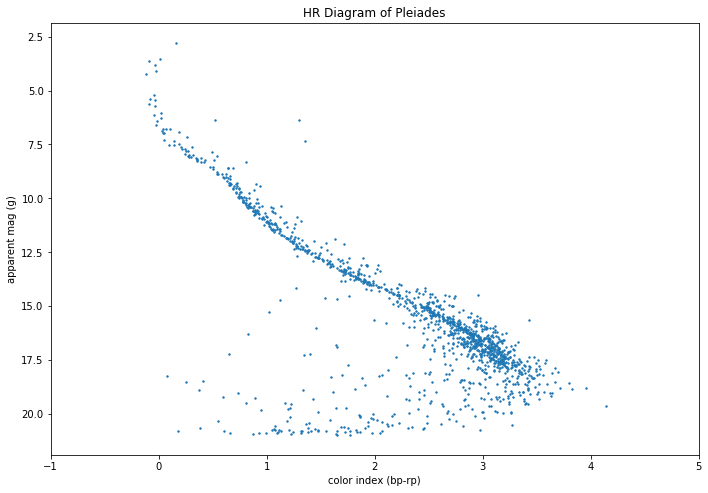

In [8]:
pleiades_4_degrees = pd.read_csv("pleiades_4_degrees.csv")
plt.scatter(pleiades_4_degrees['bp_rp'], pleiades_4_degrees['phot_g_mean_mag'], s=2)
plt.xlim(-1, 5)
plt.xlabel("color index (bp-rp)")
plt.ylabel("apparent mag (g)")
plt.title('HR Diagram of Pleiades')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.gca().invert_yaxis()
plt.show()

In [9]:
count = 0
arr = []
for star in pleiades_4_degrees.itertuples():
    if star.phot_g_mean_mag <= 17.5 and star.phot_g_mean_mag >= 5:
        arr.append(star.source_id)
        count += 1
print(count)

data = np.array(arr)

df_hr = pd.DataFrame(data, columns=['source_id'])
df_hr.head(10)

987


,source_id
0,69874243118711040
1,69838302833692160
2,69837134602589952
3,69838131035001856
4,69835622774091264
5,69877988331531904
6,69834282744302208
7,69807963184755840
8,69834866859848192
9,69876923179646080


In [10]:
count = 0
arr = []
for star in pleiades_4_degrees.itertuples():
    if star.phot_g_mean_mag <= 17.5 and star.phot_g_mean_mag >= 5:
        arr.append([star.ra, star.dec])
        count += 1
print(count)

data = np.array(arr)

df_hr_pleiades = pd.DataFrame(data, columns=['ra', 'dec'])
df_hr_pleiades = df_hr_pleiades.round(4)
df_hr_pleiades

987


,ra,dec
0,56.5832,25.4754
1,56.1561,25.1376
2,56.2147,25.0878
3,56.1341,25.1366
4,56.3160,25.1100
...,...,...
982,55.4120,22.2777
983,56.9757,22.6569
984,55.6437,22.2657
985,55.6002,22.4209


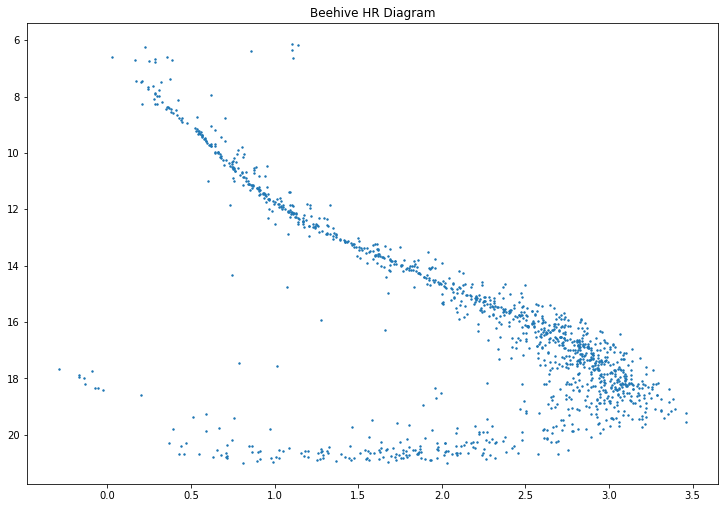

In [11]:
#SELECT * from gaiadr2.gaia_source where RA between 128.5 and 131.5 AND DEC between 18.5 and 21.5 AND parallax > 4.55 AND parallax < 7.14
beehive = pd.read_csv("beehive3.csv")
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'magnitude'] = beehive.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(beehive['bp_rp'], beehive['phot_g_mean_mag'], s=2)
plt.gca().invert_yaxis()
plt.title('Beehive HR Diagram')

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

In [12]:
count = 0
arr = []
for star in beehive.itertuples():
    if star.phot_g_mean_mag <= 18 and star.phot_g_mean_mag >= -1:
        arr.append(star.source_id)
        count += 1
print(count)

data = np.array(arr)

df_beehive = pd.DataFrame(data, columns=['source_id'])
df_beehive.head(10)

865


,source_id
0,659477217391773696
1,659489518178180864
2,659494740858299264
3,659485807326329600
4,659472235229782912
5,659488208211415040
6,659477904586536064
7,659488349947010176
8,659490377171569536
9,659490510313883264


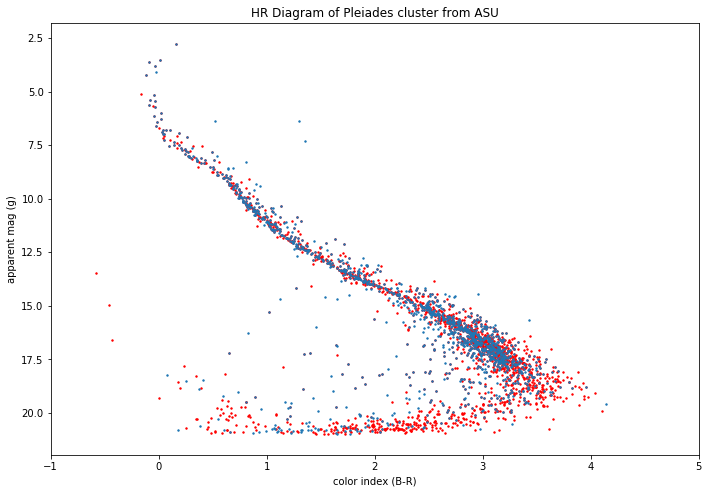

In [13]:
plt.scatter(asu['B-R'], asu['Gmag'], s=2, color='red')
plt.scatter(pleiades_4_degrees['bp_rp'], pleiades_4_degrees['phot_g_mean_mag'], s=2)
plt.xlim(-1, 5)
plt.xlabel("color index (B-R)")
plt.ylabel("apparent mag (g)")
plt.title('HR Diagram of Pleiades cluster from ASU')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.gca().invert_yaxis()
plt.show()

In [14]:
correct = 0
incorrect = 0
hr_ra = pd.Series(list(df_hr_pleiades['ra']))
hr_dec = pd.Series(list(df_hr_pleiades['dec']))
for star in df_hr_asu.itertuples():
    if star.dec in hr_dec.unique():
        correct += 1
    else:
        incorrect += 1
print("Pleiades correctly clustered: ", correct)
print("Pleiades incorrectly clustered: ", incorrect)

Pleiades correctly clustered:  708
Pleiades incorrectly clustered:  729


In [15]:
correct = 0
incorrect = 0
mergedStuffRA = pd.merge(df_hr_pleiades, df_hr_asu, on=['ra'], how='inner')
for star in mergedStuffRA.itertuples():
    if star.dec_x == star.dec_y:
        correct += 1
    else:
        incorrect += 2
#758 stars in common
print("Stars in common RA: ", len(mergedStuffRA))
print("Pleiades correctly clustered: ", correct)
print("Pleiades incorrectly clustered: ", incorrect)

Stars in common RA:  681
Pleiades correctly clustered:  604
Pleiades incorrectly clustered:  154


In [16]:
correct = 0
incorrect = 0
mergedStuffDEC = pd.merge(df_hr_pleiades, df_hr_asu, on=['dec'], how='inner')
for star in mergedStuffDEC.itertuples():
    if star.ra_x == star.ra_y:
        correct += 1
    else:
        incorrect += 2
#758 stars in common
print("Stars in common DEC: ", len(mergedStuffDEC))
print("Pleiades correctly clustered: ", correct)
print("Pleiades incorrectly clustered: ", incorrect)

Stars in common DEC:  739
Pleiades correctly clustered:  604
Pleiades incorrectly clustered:  270


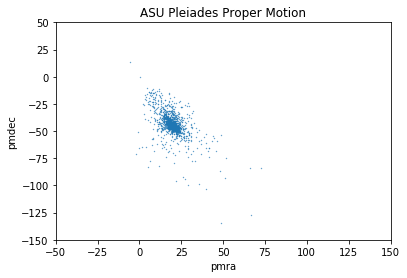

In [17]:
plt.scatter(asu['pmRACP'], asu['pmDECP'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.title("ASU Pleiades Proper Motion")
plt.xlim(-50, 150)
plt.ylim(-150, 50)
plt.show()

In [18]:
pleiades4 = pd.read_csv("pleiades_4_degrees.csv")
pleiades4 = pleiades4[['source_id', 'pmra', 'pmdec', 'parallax', 'b', 'l', 'phot_g_mean_mag']]
pleiades4.loc[:, 'parallax_arcsec'] = pleiades4['parallax'].apply(lambda x: x*.001)
pleiades4.loc[:, 'R'] = pleiades4['parallax_arcsec'].apply(distance)
pleiades4.loc[:, 'x'] = pleiades4.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'y'] = pleiades4.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'z'] = pleiades4.apply(lambda r: z(r['R'], r['b']), axis=1)
pleiades4.loc[:, 'magnitude'] = pleiades4.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

beehive3 = pd.read_csv("beehive3.csv")
#pleiades4 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
beehive3.loc[:, 'parallax_arcsec'] = beehive3['parallax'].apply(lambda x: x*.001)
beehive3.loc[:, 'R'] = beehive3['parallax_arcsec'].apply(distance)
beehive3.loc[:, 'x'] = beehive3.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'y'] = beehive3.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'z'] = beehive3.apply(lambda r: z(r['R'], r['b']), axis=1)
beehive3.loc[:, 'magnitude'] = beehive3.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

In [19]:
import math
import csv
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [20]:
#p = pleiades4[['ra', 'dec', 'pmra', 'pmdec', 'b', 'l', 'R', 'x', 'y', 'z']]
#b = beehive3[['ra', 'dec', 'pmra', 'pmdec', 'b', 'l', 'R', 'x', 'y', 'z']]
p = pleiades4[['source_id', 'pmra', 'pmdec']]
b = beehive3[['source_id', 'pmra', 'pmdec']]
frames = [p, b]
df = pd.concat(frames)
X = df.to_numpy()

# Compute DBSCAN
db = DBSCAN(eps=5, min_samples=50).fit(X) #change to 100 and get rid of MW
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #core samples of high density
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ #0 and 1 are 2 diff clusters, -1 are anomolies
#output of dbscan

import numpy as np
data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df]#, core, label]
df1 = pd.concat(frames, sort=False, axis=1)
#df1.head(30)

In [21]:
p = pleiades4[['pmra', 'pmdec']]
b = beehive3[['pmra', 'pmdec']]
frames = [p, b]
df = pd.concat(frames)
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

import numpy as np
data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df2 = pd.concat(frames, sort=False, axis=1)

In [33]:
# Number of clusters in labels, ignoring anomolies
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 631


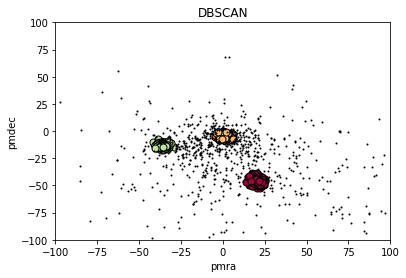

In [23]:
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.title("DBSCAN")
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

In [24]:
df3 = df1[['source_id']]
frames = [df3, df2]
df_dbscan = pd.concat(frames, sort=False, axis=1)
df_dbscan.head(30)

,source_id,pmra,pmdec,core_samples_mask,labels
0,69874243118711040,19.669678,-45.716470,True,0
1,69838302833692160,22.099286,-46.678345,True,0
2,69837134602589952,19.851148,-45.767258,True,0
3,69838131035001856,21.742460,-48.117330,True,0
4,69835622774091264,22.154529,-69.119406,False,-1
5,69877988331531904,22.661954,-52.811085,False,0
6,69834282744302208,20.732847,-45.817283,True,0
7,69807963184755840,20.272063,-46.835697,True,0
8,69834866859848192,20.827289,-46.309124,True,0
9,69876923179646080,18.905841,-45.755721,True,0


In [25]:
correct = 0
incorrect = 0
hr_id = pd.Series(list(df_hr['source_id']))
for star in df_dbscan.itertuples(): #based on stars in dbscan (1015 total)
    if star.labels == 0:
        if star.source_id in hr_id.unique():
            correct += 1
        else:
            incorrect += 1
print("Pleiades correctly clustered: ", correct)
print("Pleiades incorrectly clustered: ", incorrect)

Pleiades correctly clustered:  785
Pleiades incorrectly clustered:  230


In [26]:
correct = 0
incorrect = 0
hr_id = pd.Series(list(df_beehive['source_id']))
for star in df_dbscan.itertuples(): #based on stars in dbscan (806 total)
    if star.labels == 2:
        if star.source_id in hr_id.unique():
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  634
Beehive incorrectly clustered:  172


In [31]:
anomaly = 0
cluster1 = 0
cluster2 = 0
cluster3 = 0

for i in labels:
    if i == -1:
        anomaly += 1
    elif i == 0:
        cluster1 += 1
    elif i == 1:
        cluster2 += 1
    else:
        cluster3 += 1

print("Anomaly: ", anomaly)
print("Cluster1: ", cluster1)
print("Cluster2: ", cluster2)
print("Cluster3: ", cluster3)


Anomaly:  631
Cluster1:  1015
Cluster2:  171
Cluster3:  806


In [55]:
arr = [0] * (n_clusters_)
print("Anomaly: ", n_noise_)
for j in range(0, n_clusters_):
    for i in labels:
        if i == j:
            arr[j] += 1
    print("Cluster " + str(j+1) + ": ", arr[j])

Anomaly:  631
Cluster 1:  1015
Cluster 2:  171
Cluster 3:  806
